In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import hdbscan
from konlpy.tag import Okt
import requests
import time


def get_data_from_api(url):
    try:
        res = requests.get(url)
    except requests.exceptions.ConnectionError as e:
        return None
    except requests.exceptions.RequestException as e:
        return None

    json_data = res.json()

    return pd.DataFrame(json_data)


def preprocessing(df):
    okt = Okt()
    
    tfidf_vect = TfidfVectorizer(tokenizer=okt.morphs,
                                 ngram_range=(1, 2),
                                 min_df=0.01, max_df=0.8)

    ftr_vect = tfidf_vect.fit_transform(news_df['body'])

    return ftr_vect


def cluster_to_csv(vect):
    cluster = hdbscan.HDBSCAN(min_cluster_size=12, gen_min_span_tree=True)
    res = cluster.fit(ftr_vect)
    news_df['label'] = res.labels_
    current_time = time.strftime('%Y%m%d')
    news_df.to_csv('./' + current_time + '.csv', sep=',', encoding='utf-8', index=None)

In [8]:
news_df = get_data_from_api('http://localhost:8080/news/month')

In [10]:
ftr_vect = preprocessing(news_df)

In [11]:
cluster = hdbscan.HDBSCAN(min_cluster_size=12, gen_min_span_tree=True)
res = cluster.fit(ftr_vect)
news_df['label'] = res.labels_
news_df.to_csv('./test0522_min_df0.005.csv', sep=',', encoding='utf-8')

In [28]:
news_df[news_df['label'] != -1]

,id,title,body,hash,url,create_time,update_time,label
8,5864,가상화폐 헌트 상승세... 전일대비 +27.96%,"현재 암호화폐 거래소 ""업비트""에 따르면 가상화폐 대장 격인 비트코인의 시세는 전일...",c1772f1b0f07435696d34fdf7a1def22eb4b7640060f00...,"{'String': '', 'Valid': False}",2021-04-22T15:30:00Z,2021-04-22T15:30:00Z,163
29,5979,"눈에 띄게 수척해진 이재용…변호인 ""재판 연기 감사드린다""",이재용 삼성전자 부회장이 지난 1월 '국정농단' 사건으로 실형을 선고받고 구속된 지...,f47c938abe657eba98a5e44a3366bc2d13cc70ae6b9645...,"{'String': '', 'Valid': False}",2021-04-22T15:46:00Z,2021-04-22T15:46:00Z,106
38,6015,KB금융 1분기 순익 1조2701억…사상 최대,[서울=뉴시스] 최선윤 기자 = KB금융그룹은 올해 1분기 분기 기준 사상 최대 실...,ff9f7495f0033d0c002ac08407c8be7bc2bed0f95a0a94...,"{'String': '', 'Valid': False}",2021-04-22T06:40:00Z,2021-04-22T06:40:00Z,125
41,6028,"국회의원 이해충돌방지법, 운영위 통과…민간경력 공개",(서울=연합뉴스) 고동욱 강민경 기자 = 앞으로 국회의원들은 본인과 가족들의 사적 ...,a79a15f59742adecd2a07bc3703014654298a73491a228...,"{'String': '', 'Valid': False}",2021-04-22T07:11:00Z,2021-04-22T07:11:00Z,41
43,6033,"KB금융 1분기 순이익 1조2701억…""최대 분기실적""(종합)",[아시아경제 박선미 기자] KB금융그룹이 핵심경쟁력 강화 노력과 인수·합병(M&A)...,4b04fbff0ced0f8fb61c444b5ba77f35c3d8000732531d...,"{'String': '', 'Valid': False}",2021-04-22T07:16:00Z,2021-04-22T07:16:00Z,125
...,...,...,...,...,...,...,...,...
22805,28954,"햄버거 아닌 '크랩 케이크' 오찬…""해산물 좋아하는 文배려""",문재인 대통령이 21일(현지시간) 조 바이든 대통령과 정상회담을 갖고 예정시간을 넘...,da752e439b1753b11c915468f092e76cd26c6ddb857742...,{'String': 'https://news.naver.com/main/read.n...,2021-05-22T01:22:00Z,2021-05-22T01:39:00Z,152
22808,28957,"美, 한국군 55만에 백신 지원…한미 미사일지침 종료(종합)",(서울=연합뉴스) 임형섭 박경준 조민정 기자 = 미국이 한국군 55만명에 코로나19...,008f0861f521bd1a9b0856a81f767c20c18c05bb4eac33...,{'String': 'https://news.naver.com/main/read.n...,2021-05-22T00:45:00Z,2021-05-22T00:45:00Z,152
22811,28961,[속보] 코로나19 신규 확진 666명…다시 600명대 진입,[더팩트 | 최승진 기자] 국내 신종 코로나바이러스 감염증(코로나19) 신규 확진자...,ae2c2e54f9315b0d10597fb30dd7e98c039579a9331f6c...,{'String': 'https://news.naver.com/main/read.n...,2021-05-22T00:39:00Z,2021-05-22T00:39:00Z,180
22816,28966,백신 신규접종 23만여명…사망 의심 8건 늘어(종합),[서울=뉴시스] 구무서 기자 = 하루 코로나19 백신 접종자가 1·2차 합계 23만...,5e97f53f5b835baffa3449957d35bbfcebf0e8175cec7b...,{'String': 'https://news.naver.com/main/read.n...,2021-05-22T06:11:00Z,2021-05-22T06:11:00Z,179


In [12]:
news_df['label'].value_counts()

-1      13405
 168      702
 172      489
 165      417
 96       356
        ...  
 121       12
 69        12
 143       12
 53        12
 45        12
Name: label, Length: 182, dtype: int64

In [15]:
news_df['label'].unique()

array([ -1, 163, 106, 125,  41,  90, 136, 165, 174,  36, 179,  55, 173,
         8, 132, 172, 102, 180, 158, 147,  88,  85, 166,  47, 138,  34,
        97,  99, 153, 124,  38, 130, 108, 115,  18, 139, 156, 176,  19,
       167, 117,  98,  17, 105,  56,  25,  15, 121, 114, 127,   0,  53,
        57,  73, 119, 171, 100,  39,   2, 175,  14, 150, 154,  13,  24,
        70,  62, 146,  82,  63,  95, 178, 120, 144, 168,  33, 161, 149,
        50,  66,  21, 177,  65,  91,  10,  20, 131, 110,  60, 140,  81,
         6, 128,  89, 142,  58,  68,  78,  44, 152, 103, 143, 126, 155,
        72,  11, 123, 159,  94,  77,  84, 170,  35, 141, 112,   5, 157,
        79,  37, 162,  32,  26,  31,   7,  75,  80,  46, 133,  59,  23,
         3,  69,  76, 101,  52,  16, 118,  29,  22,   4, 160,  43,  54,
       169,  27,  28, 129,  96,   1,  61, 122,  51,  64,  86,  49, 135,
        42,  67,  45,  71, 109, 104, 107, 151, 148,  40,  83, 113, 111,
        30,  87,  93, 134,  48,   9,  92,  12, 116, 137, 164,  7

In [25]:
news_df[news_df['label'] == 9]['body']

20529    햄버거 세트를 배달 주문하면 매장에서 직접 사먹는 것보다 최대 1200원 비싼 것으...
20584    [경향신문] 햄버거 세트를 배달 주문하면 매장에서 사먹는 것보다 최대 1200원 비...
20590    주요 햄버거 프랜차이즈 업체의 제품을 배달로 구매할 경우 매장에서 구입할 때보다 비...
20633    [헤럴드경제=최원혁 기자] ‘배달비가 무료인 줄 알았는데…’　햄버거 프랜차이즈 업체...
20642    주요 햄버거 프랜차이즈 업체의 제품을 배달 주문으로 구매하면 매장에서 살 때보다 비...
20650    [파이낸셜뉴스] 일부 햄버거 프랜차이즈의 경우 동일 제품임에도 배달 시 제품가격이 ...
20675    [앵커] 코로나19 확산 이후  배달 음식 많이들 시켜 드시죠. 포장이 쉽고  먹기...
20704    주요 햄버거 프랜차이즈 업체의 제품을 배달 주문으로 구매하면 매장에서 살 때보다 비...
20781    [앵커]햄버거 업체들이 '무료 배달'로 홍보하면서 사실은 햄버거값에 배달료를 붙여서...
20805    애플리케이션에서 배달료를 ‘무료’라고 표시한 햄버거 프랜차이즈 대부분이 제품 가격에...
20816    [머니투데이 오정은 기자] ['무료 배달' 내세운 배달 햄버거 세트, 실제 매장보다...
20839    [앵커]배달 주문이 늘면서, 배달비 안받는  음식점이라고 하면 한번 더 눈길이  가...
20846    [앵커]포장하기 쉽고 먹기에도 편한 햄버거, 배달해서 먹는 흔한 음식 중 하나인데요...
20851    A 씨(31·여)는 지난 주말 배달 애플리케이션(앱)으로 가족들이 먹을 햄버거 세트...
20860    주요 햄버거 프랜차이즈 업체의 제품이 배달주문시 매장가격보다 비싼 것으로 나타났다....
20899    주요 햄버거 프랜차이즈 업체의 제품을 배달 주문하면 매장에서 직접 살 때보다 비싼 ...
Name: body, dtype: object

scan vocabs ... 
num vocabs = 933
done = 10


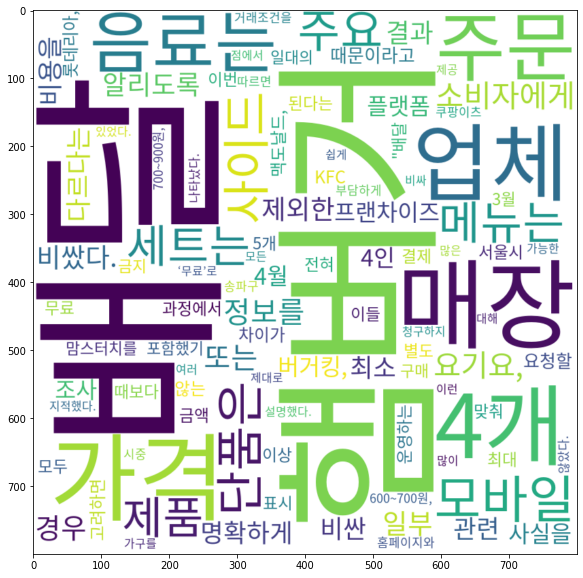

In [27]:
import matplotlib.pyplot as plt
from krwordrank.word import summarize_with_keywords
from wordcloud import WordCloud

keywords = summarize_with_keywords(news_df[news_df['label'] == 9]['body'], min_count=5, max_length=10,
    beta=0.85, max_iter=10, verbose=True, stopwords=['기자', '것으로', '지난', '대한', '있다'])

font_path = './NotoSansKR-Regular.otf'

krwordrank_cloud = WordCloud (
    font_path=font_path,
    width=800,
    height=800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keywords)

%matplotlib inline

fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()

In [58]:
fig.savefig('./0516-60.png')